# **Generating small plots used in 2023 symposium presentation**

## 1) Start with our imports:

### The cell below contains imports needed for data visualization and manipulation

In [1]:
import numpy as np
import pandas as pd
import soundfile as sf
import matplotlib.pyplot as plt

from pathlib import Path

### The cell below contains imports and `sys.path.append()` to provide access rights to the needed scripts

In [2]:
import sys

# # append the path of the
# # parent directory
sys.path.append('..')
sys.path.append('../src/')
sys.path.append('../src/models/bat_call_detector/batdetect2/')

### The cell below contains imports for the subsampling scripts. The main function demonstrated is `plt_msds_fromdf()`

In [3]:
import src.subsampling as ss

## 2) Generating figures below:

### a) Below we plot an example bat call sequence found in a representative recording:

#### i) Initialize the example recording and the part we want to plot
- This recording was collected by an Audiomoth deployed in our UBNA Foliage location on 9/10/2021 at 8pm PST

In [4]:
filepath = f"{Path.home()}/Documents/Research/Lab_related"
filename = "20210910_030000.WAV"

audio_file = sf.SoundFile(Path(f'{filepath}/{filename}'))
fs = audio_file.samplerate
offset = 0
reftimes = np.array([1439.8, 1440.85])
times = np.array([0, reftimes[1] - reftimes[0]])
step_size = 100
audio_file.seek(int(reftimes[0]*fs))
audio_sec = audio_file.read(int((reftimes[1] - reftimes[0])*fs))

#### ii) Initialize the detections .csv that we have generated for this recording stored in our `output_dir/`
- Use boolean splicing to only get low-frequency feedbuzzes to plot

In [5]:
df = pd.read_csv(f'../output_dir/BatDetectorMSDS-{filename}.csv')
fbs = df.loc[np.logical_and(df['event']=='Feeding Buzz', df['high_freq'] < 47000)]

#### iii) Plot the figures below as they appear in my symposium slide #4 and #36
- The spectrogram appearing on slide #4 is similar to the spectrogram as the one on slide #36
   - To get this spectrogram, simply set `det_linewidth` to 0 in `ss.plt_msds_fromdf()` and remove `plt.title()` for the spectrogram

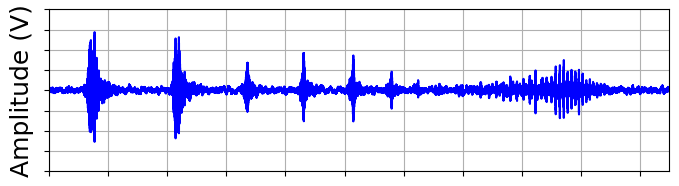

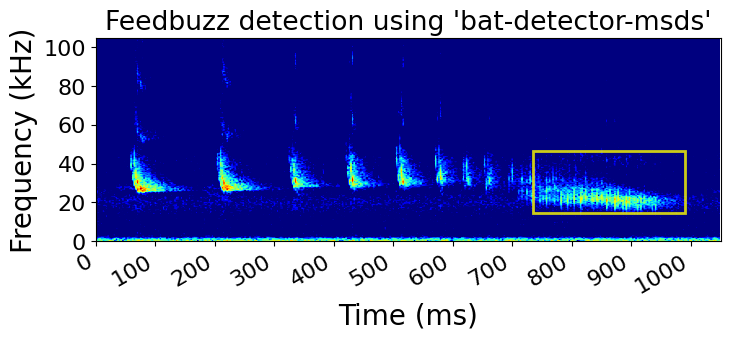

In [6]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8, 2.1))

plt.title("")
plt.plot(audio_sec, color='b')
plt.xticks(np.linspace(0, fs*(times[1]-0.05), len(np.arange(0, 1000*times[1], step_size))), '')
plt.xlabel('', fontsize=20)
plt.xlim(0, 1.05*fs)
amp_ticks = plt.yticks()[0]
plt.ylabel("Amplitude (V)", fontsize=18)
plt.yticks(np.arange(-1, 1.01, 0.25), '')
plt.ylim((-1, 1))
plt.grid(which="both")

plt.figure(figsize=(8, 4))
plt.rcParams.update({'font.size': 16})
plt.title(f'Feedbuzz detection using \'bat-detector-msds\'')
ss.plt_msds_fromdf("", filename, fbs, audio_sec, fs, offset, reftimes, times, 1800, 0.0, be_subplot=True, show_PST=True, show_legend=False, det_linewidth=2, show_audio=False, show_spectrogram=True, spec_cmap='jet', spec_NFFT = 812, rm_dB = 90, save=False)
plt.xticks(np.linspace(0, times[1]-0.05, len(np.arange(0, 1000*times[1], step_size))), np.arange(0, 1000*times[1], step_size).astype('int'))
plt.yticks(np.linspace(0, 100000, 6), np.linspace(0, 100, 6).astype('int'))
plt.ylim(0, 105000)
plt.ylabel("Frequency (kHz)", fontsize=20)
plt.xlabel(f'Time (ms)', fontsize=20)
plt.show()

### b) Below we plot figures that reference the main presentation recording:
#### i) Initialize the recording we wish to plot:
- This recording was collected by an Audiomoth deployed in our UBNA Central Pond location on 8/26/2022 at 9:30pm PST

In [7]:
input_dir = f'{Path.home()}/Documents/Research/Symposium/Recordings/recover-20220828/UBNA_010'
summer_audio_files = sorted(list(Path(input_dir).iterdir()))
date = "20220826"
location = "Central Pond"
plot_file_path = summer_audio_files[3]
plot_file = plot_file_path.name
plot_file_path

PosixPath('/Users/adityakrishna/Documents/Research/Symposium/Recordings/recover-20220828/UBNA_010/20220826_043000.WAV')

#### ii) Load in the desired recording

In [8]:
## Plot detections on audio
# Read in only section of audio with reftimes
# Zoom into section of audio with times

audio_file = sf.SoundFile(plot_file_path)
fs = audio_file.samplerate
offset = 1800
reftimes = np.array([0, 1800])
times = np.array([0, reftimes[1] - reftimes[0]])
audio_file.seek(int(reftimes[0]*fs))
audio_sec = audio_file.read(int((reftimes[1] - reftimes[0])*fs))

#### iii) First, let's plot our subsampling routine comparisons on slides 7-9

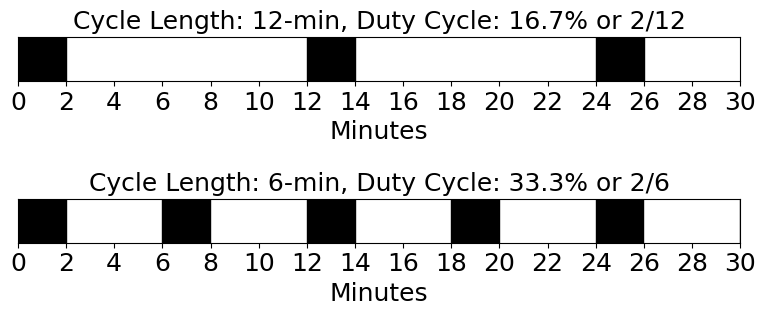

In [9]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8, 3.5))

cycle_length = 720
percent_on = 0.167
c_dets = pd.read_csv(f"../output_dir/continuous__{location.split()[0]}_{date}_030000to130000.csv")
plot_dets = c_dets[c_dets['input_file']==plot_file]
plt.subplot(211)
plt.title("Cycle Length: 12-min, Duty Cycle: 16.7% or 2/12", fontsize=18)
ss.plt_msds_fromdf(location, plot_file, plot_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on, be_subplot=True, show_PST=True, show_legend=True, show_threshold=False, lf_threshold=45000, hf_threshold=35000, show_num_dets=False, det_linewidth=1, show_audio=False, show_spectrogram=False, spec_cmap='ocean', rm_dB=220, save=False)
plt.yticks([], [])
plt.ylabel('')
plt.xticks(np.linspace(0, 1800, len(np.arange(0, 31, 2))), np.arange(0, 31, 2))
plt.xlabel('')
plt.xlabel("Minutes")

cycle_length = 360
percent_on = 0.333
c_dets = pd.read_csv(f"../output_dir/continuous__{location.split()[0]}_{date}_030000to130000.csv")
plot_dets = c_dets[c_dets['input_file']==plot_file]
plt.subplot(212)
plt.title("Cycle Length: 6-min, Duty Cycle: 33.3% or 2/6", fontsize=18)
ss.plt_msds_fromdf(location, plot_file, plot_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on, be_subplot=True, show_PST=True, show_legend=False, show_threshold=False, lf_threshold=45000, hf_threshold=35000, show_num_dets=False, det_linewidth=1, show_audio=False, show_spectrogram=False, spec_cmap='ocean', rm_dB=220, save=False)
plt.yticks([], [])
plt.ylabel('')
plt.xticks(np.linspace(0, 1800, len(np.arange(0, 31, 2))), np.arange(0, 31, 2))
plt.xlabel('')
plt.xlabel("Minutes")

plt.tight_layout()
plt.show()

#### iv) Here are the subsampling comparisons shown on slides 17 and 18

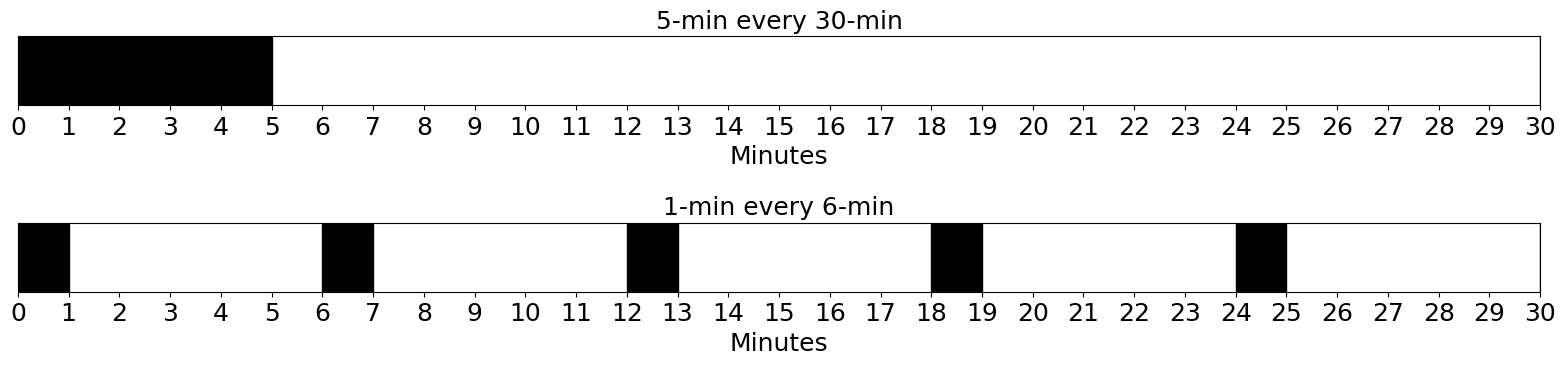

In [10]:
plt.figure(figsize=(16, 4))

cycle_length = 1800
percent_on = 0.167
c_dets = pd.read_csv(f"../output_dir/continuous__{location.split()[0]}_{date}_030000to130000.csv")
plot_dets = c_dets[c_dets['input_file']==plot_file]
plt.subplot(211)
plt.title("5-min every 30-min", fontsize=18)
ss.plt_msds_fromdf(location, plot_file, plot_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on, be_subplot=True, show_PST=True, show_legend=True, show_threshold=False, lf_threshold=45000, hf_threshold=35000, show_num_dets=False, det_linewidth=1, show_audio=False, show_spectrogram=False, spec_cmap='ocean', rm_dB=220, save=False)
plt.yticks([], [])
plt.ylabel('')
plt.xticks(np.linspace(0, 1800, len(np.arange(0, 31, 1))), np.arange(0, 31, 1))
plt.xlabel('')
plt.xlabel("Minutes")

cycle_length = 360
percent_on = 0.167
c_dets = pd.read_csv(f"../output_dir/continuous__{location.split()[0]}_{date}_030000to130000.csv")
plot_dets = c_dets[c_dets['input_file']==plot_file]
plt.subplot(212)
plt.title("1-min every 6-min", fontsize=18)
ss.plt_msds_fromdf(location, plot_file, plot_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on, be_subplot=True, show_PST=True, show_legend=False, show_threshold=False, lf_threshold=45000, hf_threshold=35000, show_num_dets=False, det_linewidth=1, show_audio=False, show_spectrogram=False, spec_cmap='ocean', rm_dB=220, save=False)
plt.yticks([], [])
plt.ylabel('')
plt.xticks(np.linspace(0, 1800, len(np.arange(0, 31, 1))), np.arange(0, 31, 1))
plt.xlabel('')
plt.xlabel("Minutes")

plt.tight_layout()
plt.show()

#### v) Below are the spectrograms shown slides 14 and 15, in order.

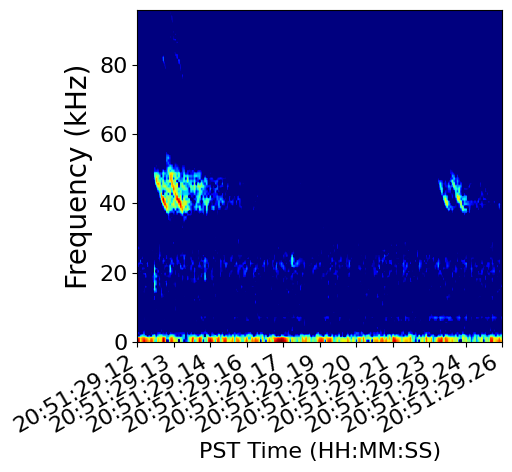

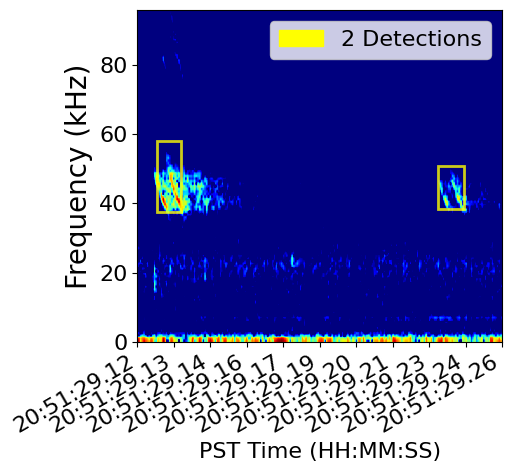

In [11]:
reftimes = np.array([1289.12, 1289.26])
times = np.array([0, reftimes[1] - reftimes[0]])
audio_file = sf.SoundFile(plot_file_path)
audio_file.seek(int(reftimes[0]*fs))
audio_sec = audio_file.read(int((reftimes[1] - reftimes[0])*fs))

plt.figure(figsize=(5.4, 5))
plt.rcParams.update({'font.size': 16})

ss.plt_msds_fromdf("", filename, plot_dets, audio_sec, fs, offset, reftimes, times, 1800, 0.0, be_subplot=True, show_PST=True, show_legend=False, det_linewidth=0, show_audio=False, show_spectrogram=True, spec_cmap='jet', rm_dB = 75, save=False)


plt.figure(figsize=(5.4, 5))
plt.rcParams.update({'font.size': 16})

ss.plt_msds_fromdf("", filename, plot_dets, audio_sec, fs, offset, reftimes, times, 1800, 0.0, be_subplot=True, show_PST=True, show_legend=False, show_num_dets=True, det_linewidth=2, show_audio=False, show_spectrogram=True, spec_cmap='jet', rm_dB = 75, save=False)

plt.show()